# Additional exploratory data analysis and statistical analysis of Swarvoski jewellery

This notebook is built on the work from the 'webscraping_and_eda.ipynb' notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_excel('swarovski_jewellery.xlsx')
earrings_df = df.loc[df['category'] == 'Earrings', :]
df.head()

,name,price,category,colours_available,discount,flag,collection,date_scraped,plating,stainless_steel,colour,finish
0,Polar Bestiary Hoop Pierced Earrings,199,Earrings,NaN,50%,Sale,NaN,2021-01-27,Rhodium plated,NaN,Multi-coloured,NaN
1,Swarovski Symbolic Lotus Pierced Earrings,149,Earrings,NaN,50%,Sale,NaN,2021-01-27,Gold-tone plated,NaN,Green,NaN
2,Shell Coral Pierced Earrings,139,Earrings,NaN,50%,Sale,NaN,2021-01-27,Gold-tone plated,NaN,Red,NaN
3,Swarovski Sparkling Dance Rainbow Pierced Earr...,139,Earrings,NaN,50%,Sale,NaN,2021-01-27,Gold-tone plated,NaN,Light multi-coloured,NaN
4,Nice Stud Pierced Earrings,89,Earrings,NaN,50%,Sale,NaN,2021-01-27,Rhodium plated,NaN,White,NaN


In [3]:
#Dropping duplicated items
duplicate_columns = ['name', 'category', 'plating', 'stainless_steel', 'finish']
df.drop_duplicates(subset = duplicate_columns, keep = 'first', inplace = True, ignore_index = True)

In [4]:
#Checking for sets
df.loc[(df['name'].str.lower().str.contains('set')) & (~ df['category'].isin(['Earrings', 'Rings']))]

,name,price,category,colours_available,discount,flag,collection,date_scraped,plating,stainless_steel,colour,finish
211,Shimmering Set,899,Necklaces and pendants,NaN,50%,Sale,NaN,2021-01-27,NaN,NaN,Dark multi-coloured,Mixed metal finish
242,Swarovski Symbolic Moon Necklace Set,149,Necklaces and pendants,NaN,NaN,NaN,NaN,2021-01-27,NaN,NaN,Multi-coloured,Mixed metal finish
593,Moonsun Bangle Set,199,Bracelets,NaN,50%,Sale,NaN,2021-01-27,Rhodium plated,NaN,White,NaN
601,Moonsun Bangle Set,199,Bracelets,NaN,50%,Sale,NaN,2021-01-27,Rose-gold tone plated,NaN,White,NaN
764,Shimmering Set,899,Brooches,NaN,50%,Sale,NaN,2021-01-27,NaN,NaN,Dark multi-coloured,Mixed metal finish


In [5]:
#Removing the shimmering set because it falls under both categories
drop_indx = df.loc[(df['name'].str.lower().str.contains('shimmering set'))].index
df.drop(drop_indx, axis = 'index', inplace = True)

In [6]:
#minimum price of earrings
earrings_df['price'].min()

59

In [7]:
#Maximum price of earrings
earrings_df['price'].max()

479

### Atelier Swarovski earrings

In [8]:
as_collection = df.loc[df['collection'] == 'Atelier Swarovski'].copy()
as_avgs = as_collection.groupby('category', as_index = False)['price'].mean()
as_avgs

,category,price
0,Bracelets,406.142857
1,Brooches,199.000000
2,Earrings,391.142857
3,Necklaces and pendants,601.500000
4,Rings,323.285714


## Statistical analysis

### Normal test

*Are the prices normally distributed?*

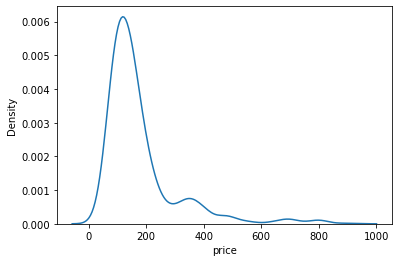

In [9]:
sns.kdeplot(data = df, x = 'price')
plt.show()

In [10]:
#Testing for normal distributions
statistics, pvalue = stats.normaltest(df['price'])
alpha = 0.05

#The null hypothesis is that the data 
#is normally distributed
if pvalue < alpha:
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis cannot be rejected')

The null hypothesis can be rejected


The prices do not have a normal distribution.

### Chi-square goodness of fit
I tested the assumption that the jewellery had an equal number of products in each category.

In [11]:
expected_freqs = [int(round(len(df) / 5, -1))] * 5
actual_freqs = df['category'].value_counts().to_numpy()
statistic, pvalue = stats.chisquare(actual_freqs, expected_freqs)

alpha = 0.05

#The null hypothesis is that the categories
#have equal frequencies
if pvalue < alpha:
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis cannot be rejected')

The null hypothesis can be rejected


The prices do not have an equal number of products in each category.

*Are the prices normally distributed based on the category?*

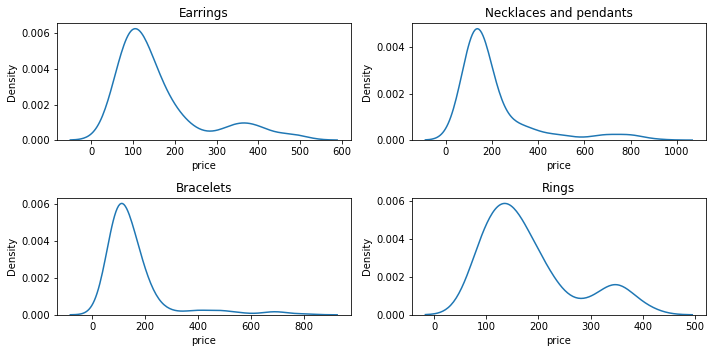

In [12]:
fig = plt.figure(figsize = (10,7))

categories_list = df['category'].unique().tolist()
for index in range(0,4):
    temp_df = df.loc[df['category'] == categories_list[index]]
    ax = fig.add_subplot(3,2, index + 1)
    sns.kdeplot(data =  temp_df, x = 'price', ax = ax, label = categories_list[index])
    ax.set_title(categories_list[index])
    plt.tight_layout()

There is no normal distribution of prices among each category.

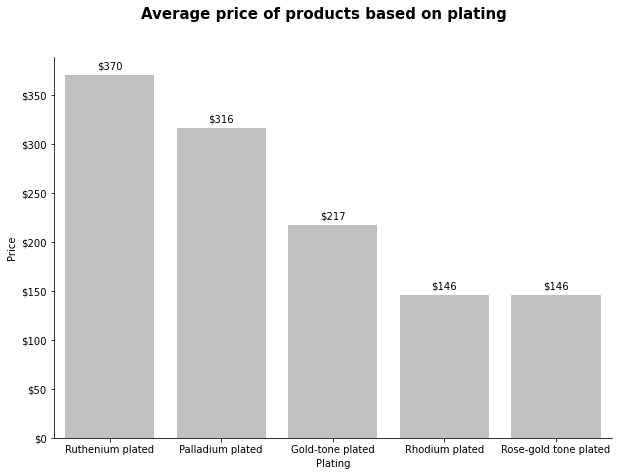

In [13]:
avg_plating = df.groupby('plating', as_index = False)['price'].mean()
avg_plating.sort_values('price', ascending = False, inplace = True)
fig, ax = plt.subplots(figsize = (10,7))

labels_order = avg_plating['plating'].to_list()
g = sns.barplot(x = 'plating', y = 'price', data = avg_plating, 
                ax = ax, color = "#C0C0C0", order = labels_order)

fig.suptitle('Average price of products based on plating', 
             fontsize = 15, fontweight = "bold")

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Plating')
ax.set_ylabel('Price')

for p in g.patches:
    height = p.get_height()
    g.annotate(f'${height:.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('plating_avg.png', dpi = 300)
plt.show()

### Confidence interval of the average price of earrings

*Testing the distribution of the prices of earrings*

In [14]:
confidence = 0.99
data = [1, 2, 3, 4, 5]

n = len(earrings_df)
avg = earrings_df['price'].mean()
std_err = stats.sem(earrings_df['price'])
mar_err = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)

min_price = avg - mar_err
max_price = avg + mar_err

In [15]:
#Minimum price
round(min_price, 2)

142.17

### Reproduced graphs for write up

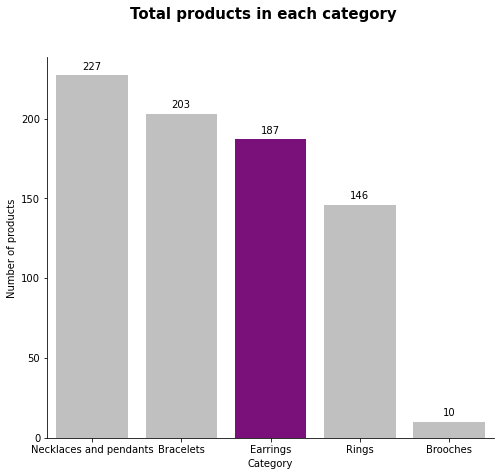

In [16]:
#Dataframe of the category value counts
category_count = pd.DataFrame(df.category.value_counts()).reset_index()
category_count.rename(columns = 
                      {'index':'category', 'category': 'num_products'}, inplace = True)


#Creating the bar graph
color_palette = ['#C0C0C0', '#C0C0C0', '#8B008B', '#C0C0C0',  '#C0C0C0']
labels_order = category_count['category'].unique().tolist()

fig, ax = plt.subplots(figsize = (8,7))
g = sns.barplot(x = 'category', y = 'num_products', data = category_count, 
            order = labels_order, palette = color_palette, ax = ax)

ax.set_xlabel('Category')
ax.set_ylabel('Number of products')


for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle('Total products in each category', fontsize = 15, fontweight = 'bold')
plt.savefig('product_count.png', dpi = 300)
plt.show()

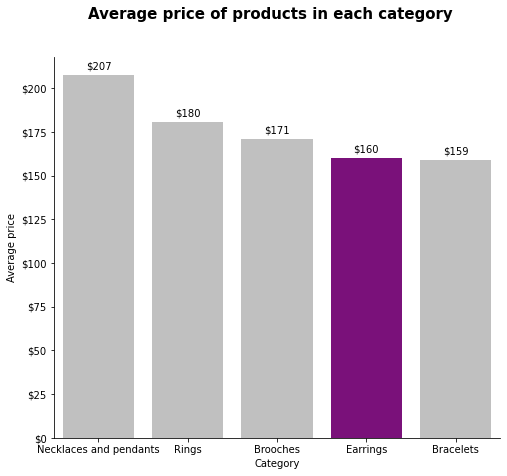

In [17]:
#Dataframe of the category value counts
avg_prices = df.groupby('category', as_index = False)['price'].mean()
avg_prices.sort_values('price', ascending = False, inplace = True)


#Creating the bar graph
color_palette = ['#C0C0C0', '#C0C0C0', '#C0C0C0', '#8B008B', '#C0C0C0']
labels_order = avg_prices['category'].unique().tolist()
fig, ax = plt.subplots(figsize = (8,7))
g = sns.barplot(x = 'category', y = 'price', data = avg_prices, 
            order = labels_order, palette = color_palette, ax = ax)

ax.set_xlabel('Category')
ax.set_ylabel('Average price')


for p in g.patches:
    height = p.get_height()
    g.annotate(f'${height:.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle('Average price of products in each category', fontsize = 15, fontweight = 'bold')
plt.savefig('avg_price.png', dpi = 300)
plt.show()

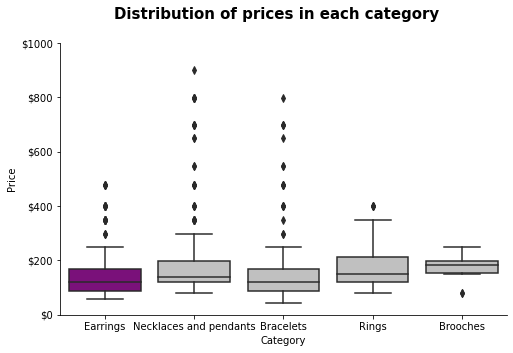

In [18]:

#Creating the boxplot
color_palette = ['#8B008B', '#C0C0C0', '#C0C0C0', '#C0C0C0',  '#C0C0C0']
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "category", y = "price", palette = color_palette, data = df, ax = ax)
ax.set_xlabel("Category")
ax.set_ylabel("Price")
ax.set_ylim((0,1000))

formatter = ticker.FormatStrFormatter("$%1.0f")
ax.yaxis.set_major_formatter(formatter)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle("Distribution of prices in each category", fontsize = 15, fontweight = "bold")
plt.savefig("prices_distribution.png", dpi = 300)
plt.show()

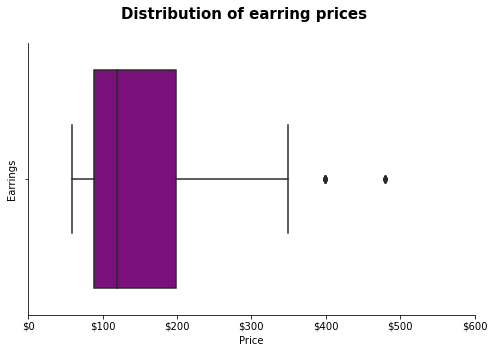

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = 'price', data = earrings_df, ax = ax, color = "#8B008B")
ax.set_xlabel("Price")
ax.set_ylabel("Earrings")
ax.set_xlim((0, 600))

formatter = ticker.FormatStrFormatter("$%1.0f")
ax.xaxis.set_major_formatter(formatter)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle("Distribution of earring prices", fontsize = 15, fontweight = "bold")
plt.savefig('earring_distribution.png', dpi = 300)
plt.show()

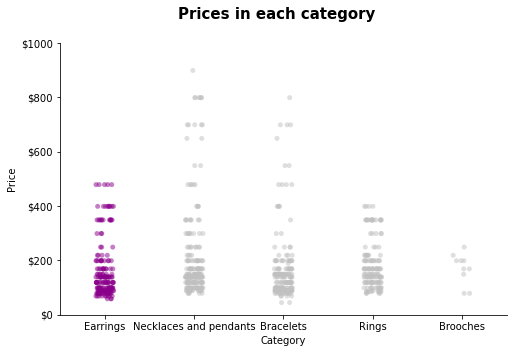

In [20]:
color_palette = [ "#8B008B", "#C0C0C0", "#C0C0C0", "#C0C0C0",  "#C0C0C0"]

#Creating the stripplot
fig, ax = plt.subplots(figsize = (8,5))
sns.stripplot(x = "category", y = "price", data = df, palette = color_palette, jitter = True, ax = ax, alpha = 0.5)
ax.set_xlabel("Category")
ax.set_ylabel("Price")
ax.set_ylim((0,1000))

formatter = ticker.FormatStrFormatter("$%1.0f")
ax.yaxis.set_major_formatter(formatter)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle("Prices in each category", fontsize = 15, fontweight = "bold")
plt.savefig("prices_jitter.png", dpi = 300)
plt.show()

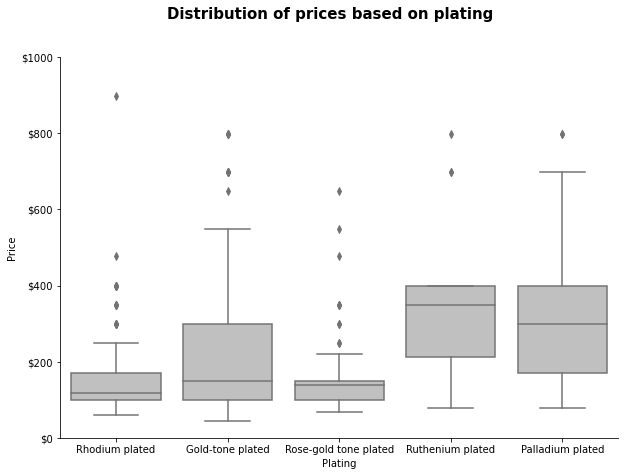

In [21]:
#Creating the subset of the products
#with plating information
plated = df.loc[~df.plating.isnull()].copy()
fig, ax = plt.subplots(figsize = (10,7))

#Creating the boxplot
sns.boxplot(x = "plating", y = "price", data = plated, color = "#C0C0C0", ax = ax)
ax.set_ylabel("Price")
ax.set_xlabel("Plating")
ax.set_ylim((0,1000))

formatter = ticker.FormatStrFormatter("$%1.0f")
ax.yaxis.set_major_formatter(formatter)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle("Distribution of prices based on plating", fontsize = 15, fontweight = "bold")
plt.savefig('plating_boxplot.png', dpi = 300)
plt.show()

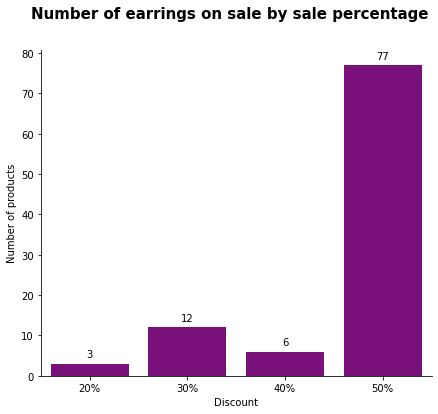

In [22]:
earrings_sales = earrings_df.loc[earrings_df['flag'] == 'Sale'].copy()
discounts = earrings_sales.groupby("discount", as_index = False)["name"].count()
discounts = discounts.reset_index(drop = True)


#Creating subplots of the different
#discount amounts for each category
fig, ax = plt.subplots(figsize = (7,6))
g = sns.barplot(x = "discount", y = "name", data = discounts, color = "#8B008B", ax = ax)    
ax.set_ylabel("Number of products")
ax.set_xlabel('Discount')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.suptitle("Number of earrings on sale by sale percentage",
             fontsize = 15, fontweight = "bold")
plt.savefig("discounts.png", dpi = 300)
plt.show()